In [1]:
import os
cwd_old = os.getcwd()
os.chdir('..')
cwd_new = os.getcwd()
print("The working directory is moved from {} to {}.".format(cwd_old, cwd_new))

The working directory is moved from /data2/sungjaecho/Projects/tacotron2/dev_ipynb to /data2/sungjaecho/Projects/tacotron2.


# 1. Create LJ-Speech-v2 DB CSV

- Use the data split provided from `NIVIDIA/tacotron2`
  - `filelists/ljs_audio_text_train_filelist.txt`
  - `filelists/ljs_audio_text_val_filelist.txt`
  - `filelists/ljs_audio_text_test_filelist.txt`

In [29]:
import pandas as pd
import os

db_path = dict()
db_path['train'] = 'filelists/ljs_audio_text_train_filelist.txt'
db_path['val']   = 'filelists/ljs_audio_text_val_filelist.txt'
db_path['test']  = 'filelists/ljs_audio_text_test_filelist.txt'

db = dict()
id_sets = dict()
for data_type in ['train', 'val', 'test']:
    id_sets[data_type] = set()
    db[data_type] = pd.read_csv(db_path[data_type], sep='|', header=None, encoding='utf-8', quoting=3)
    db[data_type] = db[data_type].rename(columns={0:"wav_path", 1:"text"})
    for i, row in db[data_type].iterrows():
        wav_id = os.path.splitext(os.path.split(row.wav_path)[1])[0]
        id_sets[data_type].add(wav_id)
    print("len(id_sets[{}]) = {}".format(data_type, len(id_sets[data_type])))

len(id_sets[train]) = 12500
len(id_sets[val]) = 100
len(id_sets[test]) = 500


# 2. Create EmoV-DB CSV

To improve
- Split data across the same script.

To do
- Import EmoV-DB
- Investigate the distribution of scripts across (speaker, emotion).

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

path_csv = '/data2/sungjaecho/data_tts/EmoV-DB/EmoV-DB/emov_db.csv'

In [2]:
df = pd.read_csv(path_csv)

In [3]:
df.columns

Index(['database', 'db_version', 'id', 'speaker', 'emotion', 'cmu_a_id',
       'script', 'sentence_path', 'duration'],
      dtype='object')

In [5]:
speakers = df.speaker.unique()
print(speakers)
emotions = df.emotion.unique()
print(emotions)

['bea' 'jenie' 'josh' 'sam']
['amused' 'angry' 'disgusted' 'neutral' 'sleepy']


## 2.1. Check scripts that all (speaker, emotion) have

**Conclusion**: There are only 19 scripts tha all (speaker, emotion) have.

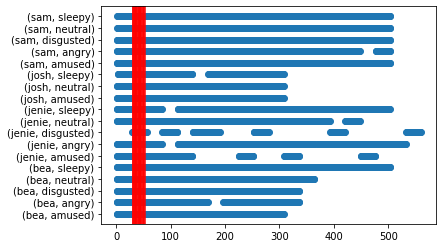

cmu_a_id_intersection {30, 31, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 49, 50, 51, 52}
len(cmu_a_id_intersection) 19


In [54]:
x = list()
y = list()
cmu_a_id_intersection = set(df.cmu_a_id.unique())
for speaker in df.speaker.unique():
    for emotion in df.emotion.unique():
        condition = (df.speaker == speaker) & (df.emotion == emotion)
        df_case = df[condition]
        if len(df_case) == 0:
            continue
        cmu_a_id_intersection = cmu_a_id_intersection.intersection(set(df_case.cmu_a_id))
        for cmu_a_id in df_case.cmu_a_id:
            x.append(cmu_a_id)
            y.append("({}, {})".format(speaker, emotion))
for cmu_a_id in cmu_a_id_intersection:
    plt.axvline(cmu_a_id, color='red')
plt.scatter(x, y)
plt.show()
print("cmu_a_id_intersection", cmu_a_id_intersection)
print("len(cmu_a_id_intersection)", len(cmu_a_id_intersection))

## 2.2. How many samples are needed for validation and test datasets

In [50]:
print(df.groupby(by=['speaker', 'emotion'])['cmu_a_id'].count())

speaker  emotion  
bea      amused       296
         angry        304
         disgusted    331
         neutral      356
         sleepy       496
jenie    amused       222
         angry        496
         disgusted    189
         neutral      417
         sleepy       466
josh     amused       298
         neutral      302
         sleepy       259
sam      amused       501
         angry        468
         disgusted    496
         neutral      492
         sleepy       495
Name: cmu_a_id, dtype: int64


### 2.2.1. 20% of samples of each (speaker, emotion)

In [63]:
test_ratio = 0.2
print("\n===== Test set samples =====")
print(df.groupby(by=['speaker', 'emotion'])['cmu_a_id'].count() * test_ratio)
print("\n===== Validation set samples =====")
print(df.groupby(by=['speaker', 'emotion'])['cmu_a_id'].count() * (1 - test_ratio) * test_ratio)
print("\n===== Training set samples =====")
print(df.groupby(by=['speaker', 'emotion'])['cmu_a_id'].count() * (1 - test_ratio) * (1 - test_ratio))


===== Test set samples =====
speaker  emotion  
bea      amused        59.2
         angry         60.8
         disgusted     66.2
         neutral       71.2
         sleepy        99.2
jenie    amused        44.4
         angry         99.2
         disgusted     37.8
         neutral       83.4
         sleepy        93.2
josh     amused        59.6
         neutral       60.4
         sleepy        51.8
sam      amused       100.2
         angry         93.6
         disgusted     99.2
         neutral       98.4
         sleepy        99.0
Name: cmu_a_id, dtype: float64

===== Validation set samples =====
speaker  emotion  
bea      amused       47.36
         angry        48.64
         disgusted    52.96
         neutral      56.96
         sleepy       79.36
jenie    amused       35.52
         angry        79.36
         disgusted    30.24
         neutral      66.72
         sleepy       74.56
josh     amused       47.68
         neutral      48.32
         sleepy       41.

In [66]:
test_ratio = 0.2
print("\n===== Test set samples =====")
print(df.groupby(by=['speaker', 'emotion'])['duration'].sum() * test_ratio)
print("\n===== Validation set samples =====")
print(df.groupby(by=['speaker', 'emotion'])['duration'].sum() * (1 - test_ratio) * test_ratio)
print("\n===== Training set samples =====")
print(df.groupby(by=['speaker', 'emotion'])['duration'].sum() * (1 - test_ratio) * (1 - test_ratio))


===== Test set samples =====
speaker  emotion  
bea      amused       204.158612
         angry        174.308717
         disgusted    273.560889
         neutral      194.499075
         sleepy       460.246667
jenie    amused       190.879991
         angry        337.354558
         disgusted    143.875683
         neutral      233.589814
         sleepy       357.166041
josh     amused       191.162621
         neutral      145.916735
         sleepy       193.274358
sam      amused       553.288544
         angry        264.010095
         disgusted    512.974494
         neutral      263.782186
         sleepy       507.526458
Name: duration, dtype: float64

===== Validation set samples =====
speaker  emotion  
bea      amused       163.326890
         angry        139.446973
         disgusted    218.848711
         neutral      155.599260
         sleepy       368.197333
jenie    amused       152.703993
         angry        269.883646
         disgusted    115.100546
       